<a href="https://colab.research.google.com/github/heisenberg12/MNIST-Neural-Net/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modules

In [0]:
import numpy as np
import pandas as pd
import math as e
import matplotlib.pyplot as plt
import random
from google.colab import files
import cv2

#Datasets

In [0]:
data = pd.read_csv("/content/drive/My Drive/Datasets/MNIST Dataset/mnist_dataset.csv")
mnist_data = data

#Activation Class

In [0]:
class Activation(object):

  def sigmoid_activation(self,Z):
    sigmoid = np.zeros(Z.shape , dtype=np.float128)
    sigmoid = [self.sigmoid_function(x) for x in Z]
    return sigmoid

  def sigmoid_function(self , x):
    if x >= 0:
      z = np.exp(-x)
      return 1 / (1 + z)
    else:
      z = np.exp(x)
      return z / (1 + z)

  def derivative_sigmoid(self , a):
    return a*(1-a)

  def RELU_activation(self , Z):
    rectifier = np.zeros(Z.shape, dtype=np.float128)
    for x,y in np.ndindex(Z.shape):
      rectifier[i][j] = Z[i][j] if Z[x][y] > 0 else n*z[i][j]
    return rectifier

  def derivative_RELU(self , a):
    derivative_rectifier = np.zeros(a.shape , dtype=np.float128)
    for x,y in np.ndindex(a.shape):
      derivative_rectifier[i][j] = 1 if a[x][y] > 0 else n
    return derivative_rectifier

  def softmax(self , Z):
    P = np.exp(Z)
    Sum = np.sum(P)
    return np.divide(P , Sum)

  def derivative_softmax(self , P):
    return P*(1-P)


#Cost Function

In [0]:
class Cost(object):
  
  def Cross_Entropy(self , a , y_index):
    y_index = int(y_index)
    return -np.log(a[y_index - 1])

  def derivative_Cross_Entropy(self , P , y_index):
    y_index = int(y_index)
    P[y_index - 1] = P[y_index - 1] - 1
    return P



#CNN Model

Abbrievations
1. ils : input layer size</br>
2. hls : hidden layer size</br>
3. hl : hidden layers</br>
4. ols : output layer size</br>
5. lr : learning rate</br>
6. lc : lambda constant</br>
7. k  : folds

In [0]:
 class CNN(object):

#-------------------------------------------------------------------------INITIALIZATION-----------------------------------------------------------------------------------------------------------
  def __init__(self,ils,hls,hl,ols,data,dir,k,lr,lc,epochs):
      self.ils = ils
      self.hls = hls
      self.hl = hl
      self.k = k
      self.ols = ols
      self.data = data
      self.dir = dir
      self.lr = lr
      self.lc = lc
      self.epochs = epochs
      self.create_weights()
      self.initialize()
      self.data = data

  def initialize(self):
    self.act = Activation()
    self.cost = Cost()
    

  def create_weights(self):
    He = e.sqrt(6/self.ils)
    h1_weights=np.zeros((self.hls,self.ils) , dtype=np.float128)
    h_weights=np.zeros((self.hl-1,self.hls,self.hls) , dtype=np.float128)
    o_weights=np.zeros((self.ols,self.hls) , dtype=np.float128)
    h_bias=np.zeros((self.hl , self.hls) , dtype=np.float128) 
    o_bias=np.zeros(self.ols  , dtype=np.float128)

    h1_weights += np.random.randn(*h1_weights.shape)*He
    h_weights += np.random.randn(*h_weights.shape)*He
    o_weights += np.random.randn(*o_weights.shape)*He
    h_bias += np.random.randn(*h_bias.shape)*He
    o_bias += np.random.randn(*o_bias.shape)*He

    self.h1_weights = h1_weights
    self.h_weights = h_weights
    self.o_weights = o_weights
    self.h_bias = h_bias
    self.o_bias = o_bias
#------------------------------------------WEIGHTS AND BIASES PICKLING------------------------------------------------------------------------------
  def save(self , weights_h1 , weights_h , weights_o,bias_h ,bias_o ,name):
    loc = '/content/drive/My Drive/CNN/Weights/' + name + ".npz"
    np.savez(loc , x=weights_h1 ,y=weights_h , z=weights_o , a=bias_h , b=bias_o);

  def load(self , Weights):
    loc = '/content/drive/My Drive/CNN/Weights/' + Weights + ".npz"
    with np.load(loc) as data:
      self.weights_h1 = data['x']
      self.weights_h  = data['y']
      self.weights_o = data['z']
      self.bias_h = data['a']
      self.bias_o = data['b']


  def printWB(self):
    print("_____________________________________________________________________")
    print("                    Hidden Layer 1")
    print("_____________________________________________________________________")
    print("Biases: ",self.h_bias[0])
    for i in range(self.hls):
      print("-------------------------------------------------------------------")
      print("Neuron ",i+1," Weights: ",self.h1_weights[i] )

    for i in range(self.hl - 1):
       print("__________________________________________________________________")
       print("                    Hidden Layer ",i + 2)
       print("__________________________________________________________________")
       print("Biases: ",self.h_bias[i+1])
       for j in range(self.hls):
        print("--------------------------------------------------------")
        print("Neuron ",j+1," Weights:\n ",self.h_weights[i][j] )

    print("_____________________________________________________________________")
    print("                    Output Layer")
    print("_____________________________________________________________________")
    print("Biases: ",self.o_bias)
    for i in range(self.ols):
      print("-------------------------------------------------------------------")
      print("Neuron ",i+1," Weights: \n",self.o_weights[i] )

  #--------------------------------------------------------------------------PLOT---------------------------------------------------------------
  def plot(self , cost , accuracy):
    X = np.arange(self.epochs)
    plt.plot(X , accuracy , label="ACCURACY VS EPOCHS")
    plt.xlabel('EPOCHS--->')
    plt.ylabel('ACCURACY--->')
    plt.title('ACCURACY VS EPOCHS')
    plt.show()
    plt.plot(X , cost , label="COST VS EPOCHS")
    plt.xlabel('EPOCHS--->')
    plt.ylabel('COST--->')
    plt.title('COST VS EPOCHS')
    plt.show()


  #------------------------------------------------------------------K FOLD CROSS VALIDATION ----------------------------------------------------
  def split(self,i,p):
    df=self.data
    rows,cols=df.shape
    k=int(rows/p)
    l=rows-k
    y=k*i
    x=y+k
    test=df[y:x]
    test=test.values
    test_x=test[:,0:cols-1]
    test_y=test[:,cols-1]
    train=df.drop(df.index[y:x])
    train=train.values
    train_x=train[:,0:cols-1]
    train_y=train[:,cols-1]

    return train_x,train_y,test_x,test_y


    #-------------------------------------------------------------------FEEDFORWARD(TRAINING)--------------------------------------------------------
  def feedforward(self,alpha):
    inp = alpha
    hidden_activations = np.zeros((self.hl,self.hls), dtype=np.float128)
    output_activations = np.zeros(self.ols , dtype=np.float128)
    alpha = np.reshape(alpha,(self.ils,1))
    alpha = np.matmul(self.h1_weights , alpha).T
    alpha = np.add(alpha , self.h_bias[0])
    alpha = self.act.sigmoid_activation(alpha.flatten())
    hidden_activations[0] = alpha

    for layers in range(self.hl - 1):
      alpha = np.reshape(alpha,(self.hls,1))
      alpha = np.matmul(self.h_weights[layers] , alpha).T
      alpha = np.add(alpha , self.h_bias[layers + 1])
      alpha = self.act.sigmoid_activation(alpha.flatten())
      hidden_activations[layers + 1] = alpha

    alpha = np.reshape(alpha,(self.hls,1))
    output_activations = np.matmul(self.o_weights,alpha).T.flatten()
    output_activations = np.add(output_activations,self.o_bias)
    output_activations = self.act.softmax(output_activations.flatten())

    return inp , hidden_activations , output_activations


     #------------------------------------------------------------------FEEDFORWARD(TESTING)-------------------------------------------------------
  def FEEDFORWARD(self,alpha):
    inp = alpha
    hidden_activations = np.zeros((self.hl,self.hls), dtype=np.float128)
    output_activations = np.zeros(self.ols, dtype=np.float128)
    alpha = np.reshape(alpha,(self.ils,1))
    alpha = np.matmul(self.h1_weights , alpha).T
    alpha = np.add(alpha , self.h_bias[0])
    alpha = self.act.sigmoid_activation(alpha.flatten())
    hidden_activations[0] = alpha

    for layers in range(self.hl - 1):
      alpha = np.reshape(alpha,(self.hls,1))
      alpha = np.matmul(self.h_weights[layers] , alpha).T
      alpha = np.add(alpha , self.h_bias[layers + 1])
      alpha = self.act.sigmoid_activation(alpha.flatten())
      hidden_activations[layers + 1] = alpha

    alpha = np.reshape(alpha,(self.hls,1))
    output_activations = np.matmul(self.o_weights,alpha).T.flatten()
    output_activations = np.add(output_activations,self.o_bias)
    output_activations = self.act.softmax(output_activations.flatten())

    return output_activations.flatten()

#------------------------------------------------------------------------BACKPROPOGATION-------------------------------------------------------------
  def backpropogation(self,inp,y):
    del_hbias = np.zeros(self.h_bias.shape, dtype=np.float128)
    del_obias = np.zeros(self.o_bias.shape, dtype=np.float128)
    del_hweights = np.zeros(self.h_weights.shape, dtype=np.float128)
    del_h1weights = np.zeros(self.h1_weights.shape, dtype=np.float128)
    del_oweights = np.zeros(self.o_weights.shape, dtype=np.float128)

    inp , hidden_activations , output_activations = self.feedforward(inp)

    del_a_z = self.act.derivative_softmax(output_activations)
    del_z_w = hidden_activations[-1]
    del_c_a = self.cost.derivative_Cross_Entropy(output_activations , y)
    del_obias = del_c_a*del_a_z
    del_oweights = np.matmul(np.reshape(del_obias,(self.ols , 1)) ,np.reshape(del_z_w,(1 , self.hls)))
    del_cost = np.matmul(del_obias , self.o_weights)

    
    for Layer in reversed(range(1 , self.hl)):
      del_a_z = self.act.derivative_sigmoid(hidden_activations[Layer])
      del_z_w = hidden_activations[Layer - 1]
      del_hbias[Layer] = del_cost*del_a_z
      del_hweights[Layer - 1] = np.matmul(np.reshape(del_hbias[Layer],(self.hls , 1)) ,np.reshape(del_z_w,(1 , self.hls)))
      del_cost = np.matmul(del_hbias[Layer] , self.h_weights[Layer - 1])

    del_a_z = self.act.derivative_sigmoid(hidden_activations[0])
    del_z_w = inp
    del_hbias[0] = del_cost*del_a_z
    del_h1weights = np.matmul(np.reshape(del_hbias[0],(self.hls , 1)) , np.reshape(del_z_w,(1 , self.ils)))

    return del_h1weights , del_hweights , del_oweights , del_hbias , del_obias

#-----------------------------------------------------------------------GRADIENT DESCEND-------------------------------------------------------------
  def GCD(self):
    fold=self.k
    cost_array = np.zeros(self.epochs)
    accuracy_array = np.zeros(self.epochs)
    size = self.data.shape[0]
    for epoch in range(self.epochs):
      accuracy = 0
      cost_function = 0
      #k-FOLD CROSS VALIDATION
      for s in range(fold):
        train_x , train_y , test_x ,test_y = self.split(s,fold)
        #TRAINING
        for i in range(train_x.shape[0]):
          del_h1weights , del_hweights , del_oweights , del_hbias , del_obias = self.backpropogation(train_x[i] , train_y[i])
          self.h1_weights = self.h1_weights - (self.lr)*(self.lc)*del_h1weights
          self.h_weights = self.h_weights - (self.lr)*(self.lc)*del_hweights
          self.o_weights = self.o_weights - (self.lr)*(self.lc)*del_oweights
          self.h_bias = self.h_bias - (self.lr)*(self.lc)*del_hbias
          self.o_bias = self.o_bias - (self.lc)*(self.lc)*del_obias
        
        #TESTING
        for i in range(test_x.shape[0]):
          activations = self.FEEDFORWARD(test_x[i])
          y_pred = np.argmax(activations) + 1
          y = int(test_y[i])
          accuracy += 1 if y==y_pred else 0
          cost_function += self.cost.Cross_Entropy(activations , y)
      print("Epoch: ",epoch+1,"\t\tAccuracy: ",(accuracy/size)*100,"%\t\tCost: ",cost_function/size)
      accuracy_array[epoch] = accuracy/size
      cost_array[epoch] = cost_function/size
    self.plot(cost_array , accuracy_array)
    self.save(self.h1_weights , self.h_weights , self.o_weights , self.h_bias , self.o_bias,"mnist_weights")    
#----------------------------------------------------------------------STOCHASTIC GRADIENT DESCEND--------------------------------------------------------
  def SGCD(self , training_batch_size , testing_batch_size):
    accuracy_array = np.zeros(self.epochs)
    cost_array = np.zeros(self.epochs)
    rows , cols = self.data.shape
    data_x = self.data.values[:,0:cols-1]
    data_y = self.data.values[:,cols-1].astype(np.int) + 1
    size = testing_batch_size
    for epoch in range(self.epochs):
      #TRAINING
      for X in range(training_batch_size):
        index = random.randint(0 , rows-1)
        del_h1weights , del_hweights , del_oweights , del_hbias , del_obias = self.backpropogation(data_x[index] , data_y[index])
        self.h1_weights = self.h1_weights - (self.lr)*(self.lc)*del_h1weights
        self.h_weights = self.h_weights - (self.lr)*(self.lc)*del_hweights
        self.o_weights = self.o_weights - (self.lr)*(self.lc)*del_oweights
        self.h_bias = self.h_bias - (self.lr)*(self.lc)*del_hbias
        self.o_bias = self.o_bias - (self.lr)*(self.lc)*del_obias
      #TESTING
      accuracy = 0
      cost_function = 0
      for X in range(testing_batch_size):
        index = random.randint(0 , rows-1)
        activations = self.FEEDFORWARD(data_x[index])
        y_pred = np.argmax(activations) + 1
        accuracy += 1 if data_y[index]==y_pred else 0
        cost_function += self.cost.Cross_Entropy(activations , data_y[index])
      print("Epoch: ",epoch+1,"\t\tAccuracy: ",(accuracy/size)*100,"%\t\t\t\t\tCost: ",cost_function/size)
      accuracy_array[epoch] = accuracy/size
      cost_array[epoch] = cost_function/size
    self.plot(cost_array , accuracy_array)
    self.save(self.h1_weights , self.h_weights , self.o_weights , self.h_bias , self.o_bias,"mnist_weights")    


  #------------------------------------------------------------------------CLASSIFIER---------------------------------------------
  def classifier(self , inp):
    activations = self.FEEDFORWARD(inp)
    y = np.argmax(activations)
    return self.dir[y]

#Test Bench

In [0]:
dir = ["zero" , "one" , "two" , "three" , "four" , "five" , "six" , "seven" , "eight" , "nine"]
net = CNN(784 , 512 , 1 , 10 , mnist_data , dir , 10 , 0.0005 , 1 , 20)

Epoch:  1 		Accuracy:  51.4 %					Cost:  1.5347287315824967087
Epoch:  2 		Accuracy:  70.8 %					Cost:  1.0185323526209894894
Epoch:  3 		Accuracy:  80.2 %					Cost:  0.7495780624651206532
Epoch:  4 		Accuracy:  81.69999999999999 %					Cost:  0.67631794900461427377
Epoch:  5 		Accuracy:  83.1 %					Cost:  0.63478095352193492063
Epoch:  6 		Accuracy:  84.35000000000001 %					Cost:  0.5645607618232694336
Epoch:  7 		Accuracy:  85.35000000000001 %					Cost:  0.5302964655584029676
Epoch:  8 		Accuracy:  86.1 %					Cost:  0.5305399247018887956
Epoch:  9 		Accuracy:  86.15 %					Cost:  0.5192012993435922766
Epoch:  10 		Accuracy:  88.5 %					Cost:  0.45534327159399329665
Epoch:  11 		Accuracy:  88.35 %					Cost:  0.46056519690829842125
Epoch:  12 		Accuracy:  87.85 %					Cost:  0.4545235572354680504
Epoch:  13 		Accuracy:  87.85 %					Cost:  0.46299617862712225184
Epoch:  14 		Accuracy:  88.05 %					Cost:  0.467252645793057343
Epoch:  15 		Accuracy:  89.25 %					Cost:  0.39723058044421006543

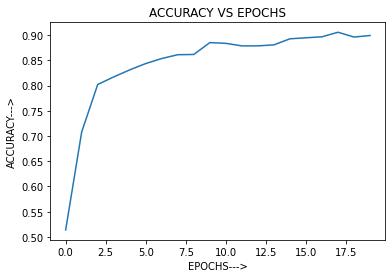

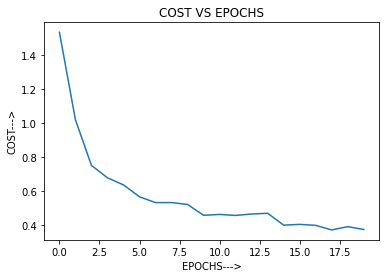

In [0]:
net.SGCD(10000 , 2000)

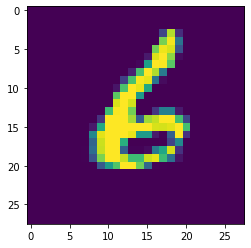

'six'

In [0]:
image = cv2.imread("/content/imag2.png")
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smooth_img = cv2.GaussianBlur(grey_img,(5,5),cv2.BORDER_DEFAULT)
final_img=cv2.resize(smooth_img,(28,28))
plt.imshow(final_img)
plt.show()
test=np.array(final_img).flatten()
net.classifier(test)